In [1]:
#import some packages you will need
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import scipy.stats as ss
import corner

In [2]:
#define your function for the "thing" you want to compute, based on your 4 parameters
def total_model(param1,param2,param3,param4):
    some_value=2*param1+param2+3*param3+param4
    return(some_value)

# Simple Monte Carlo (MC) Sampling

22.01479960332625
7.377145640532268
7.342399282760365


(array([1.71797195e-05, 2.57695792e-05, 6.87188779e-05, 1.37437756e-04,
        2.06156634e-04, 3.52184249e-04, 5.15391584e-04, 9.62064290e-04,
        1.55476461e-03, 2.32785199e-03, 3.71081941e-03, 5.23122458e-03,
        6.86329793e-03, 9.60346318e-03, 1.28418403e-02, 1.72742079e-02,
        2.16808060e-02, 2.66457449e-02, 3.16364534e-02, 3.74775580e-02,
        4.32241742e-02, 4.87560439e-02, 5.07403015e-02, 5.56365215e-02,
        5.43308628e-02, 5.71655165e-02, 5.36264943e-02, 5.13587714e-02,
        4.70294820e-02, 4.30953263e-02, 3.67474199e-02, 3.28819831e-02,
        2.61647128e-02, 2.09163085e-02, 1.69134338e-02, 1.21632414e-02,
        9.23409921e-03, 7.12099372e-03, 4.58698510e-03, 2.80029427e-03,
        1.98425760e-03, 1.28847896e-03, 7.98856955e-04, 5.75520602e-04,
        3.17824810e-04, 1.80387054e-04, 9.44884571e-05, 7.73087376e-05,
        8.58985973e-06, 3.43594389e-05]),
 array([-7.0384455 , -5.87428213, -4.71011877, -3.54595541, -2.38179204,
        -1.21762868, 

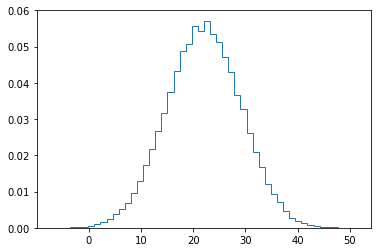

In [18]:
#define number of samples
nsamp = 100000

#draw samples from parameter distributions (here I have assumed normal distributions)
par1 = ss.norm(loc=5.,scale=3).rvs(nsamp)
par2 = ss.norm(loc=3.,scale=1.).rvs(nsamp)
par3 = ss.norm(loc=2.,scale=1.).rvs(nsamp)
par4 = ss.norm(loc=3.,scale=2.).rvs(nsamp)

#compute "thing" you are interested in, using above samples
thing = total_model(par1,par2,par3,par4)

#print out median and 1 sigma values for "thing" + plot a histogram
print(np.median(thing))
print(np.median(thing)-np.quantile(thing,0.15))
print(np.quantile(thing,0.85)-np.median(thing))
plt.hist(thing,bins=50,histtype='step',density=True)

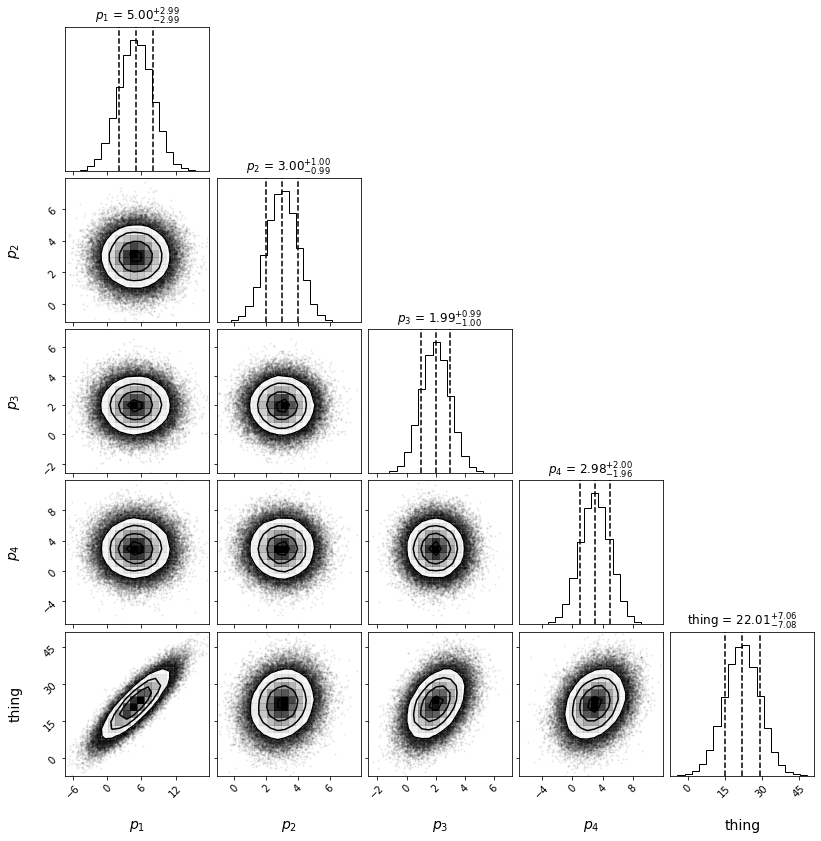

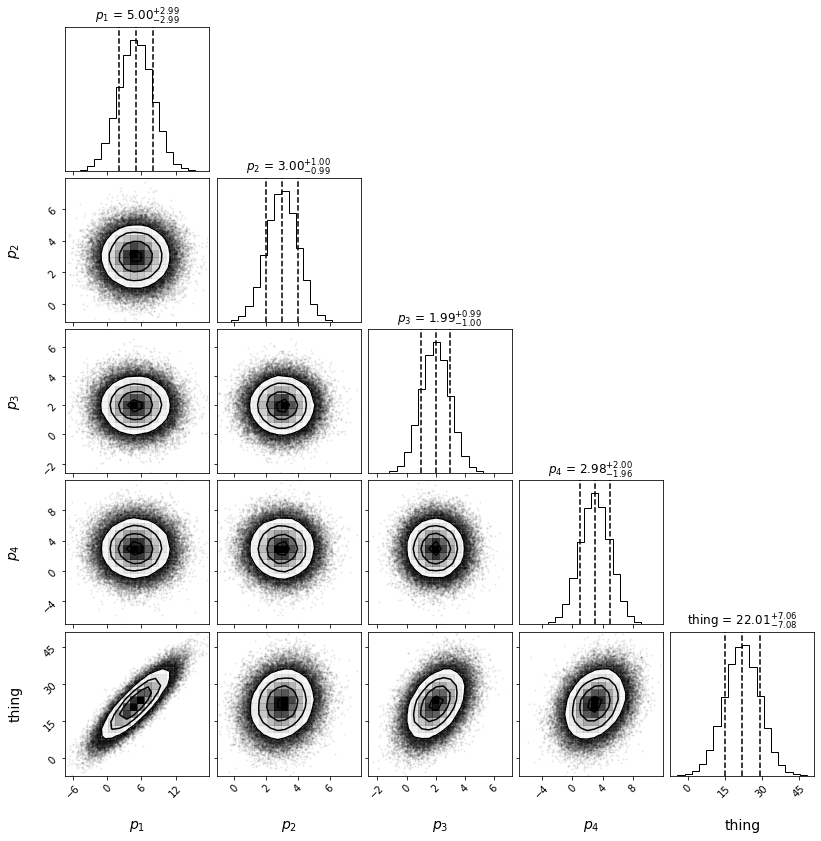

In [19]:
corner.corner(np.array([par1,par2,par3,par4,thing]).T,labels=[r"$p_1$",r"$p_2$",r"$p_3$",r"$p_4$","thing"],quantiles=[0.16,0.5,0.84],\
              label_kwargs={"size": 14},show_titles=True,title_kwargs={"fontsize": 12})


# MCMC Sampling with PyMC

/var/folders/f4/vlzp24jx6r9962ljc6g1mcn00000gn/T/ipykernel_98218/4095861922.py:13: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(draws=nsamp)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [par4, par3, par2, par1]


Sampling 4 chains for 1_000 tune and 100_000 draw iterations (4_000 + 400_000 draws total) took 47 seconds.


21.99555564315846
7.414184502806702
7.441172898477571


(array([5.76467126e-06, 1.34508996e-05, 3.65095847e-05, 5.38035984e-05,
        1.01842526e-04, 2.15214394e-04, 3.91997646e-04, 7.09054565e-04,
        1.05877795e-03, 1.74285228e-03, 2.84582605e-03, 4.34464057e-03,
        6.46796116e-03, 9.67696149e-03, 1.31434505e-02, 1.78205204e-02,
        2.29453132e-02, 2.86388868e-02, 3.50011623e-02, 4.08292450e-02,
        4.63498785e-02, 5.09270275e-02, 5.38823823e-02, 5.53350794e-02,
        5.44646141e-02, 5.26160762e-02, 4.99355040e-02, 4.46012615e-02,
        3.91651765e-02, 3.33351723e-02, 2.76031676e-02, 2.14157537e-02,
        1.61948831e-02, 1.21000450e-02, 8.65469312e-03, 5.78580839e-03,
        4.02758365e-03, 2.48841643e-03, 1.55261813e-03, 9.18504288e-04,
        5.97604254e-04, 3.09370691e-04, 1.47959896e-04, 8.45485118e-05,
        5.57251555e-05, 1.34508996e-05, 1.15293425e-05, 3.84311417e-06,
        0.00000000e+00, 1.92155709e-06]),
 array([-9.03934917, -7.73832094, -6.43729272, -5.1362645 , -3.83523628,
        -2.53420806, 

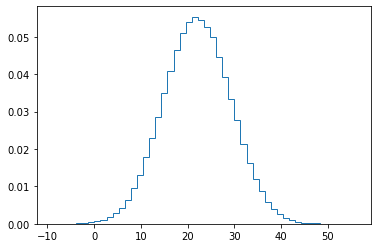

In [22]:
#define number of samples
nsamp=100000

with pm.Model() as model:
    #define parameter distributions
    par1 = pm.Normal('par1',5,3)
    par2 = pm.Normal('par2',3,1)
    par3 = pm.Normal('par3',2,1)
    par4 = pm.Normal('par4',3,2)
    #compute "thing"
    thingy = pm.Deterministic('thingy',total_model(par1,par2,par3,par4))
    #sample "thing"
    trace = pm.sample(draws=nsamp)

#print out median and 1 sigma values for "thing" + plot a histogram
print(np.median(trace['thingy']))
print(np.median(trace['thingy'])-np.quantile(trace['thingy'],0.15))
print(np.quantile(trace['thingy'],0.85)-np.median(trace['thingy']))
plt.hist(trace['thingy'],bins=50,density=True,histtype='step')


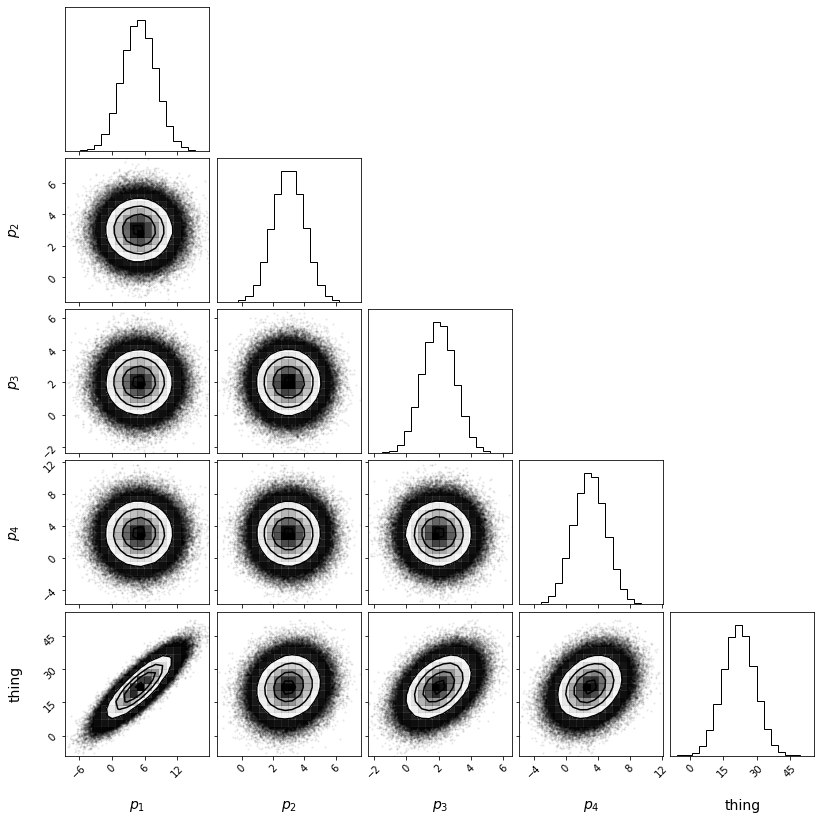

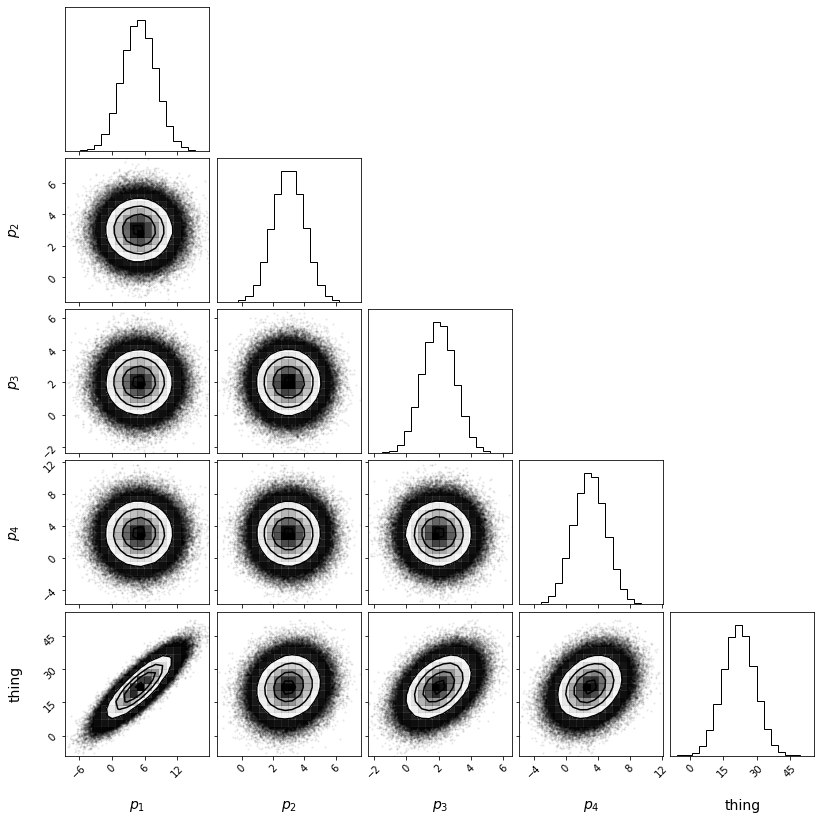

In [23]:
p1=trace['par1']
p2=trace['par2']
p3=trace['par3']
p4=trace['par4']
thingMCMC=trace['thingy']
stacked_data=np.hstack([p1.reshape((-1, 1)),\
             p2.reshape((-1, 1)),\
             p3.reshape((-1, 1)),\
             p4.reshape((-1, 1)),\
             thingMCMC.reshape((-1,1))])

corner.corner(stacked_data,labels=[r"$p_1$",r"$p_2$",r"$p_3$",r"$p_4$","thing"],\
              label_kwargs={"size": 14})

# Compare the two methods

MC
22.01479960332625
7.377145640532268
7.342399282760365

MCMC
21.99555564315846
7.414184502806702
7.441172898477571


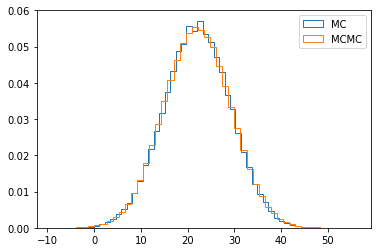

In [24]:
print('MC')
print(np.median(thing))
print(np.median(thing)-np.quantile(thing,0.15))
print(np.quantile(thing,0.85)-np.median(thing))
print('\nMCMC')
print(np.median(trace['thingy']))
print(np.median(trace['thingy'])-np.quantile(trace['thingy'],0.15))
print(np.quantile(trace['thingy'],0.85)-np.median(trace['thingy']))

plt.hist(thing,bins=50,density=True,histtype='step',label='MC')
plt.hist(trace['thingy'],bins=50,density=True,histtype='step',label='MCMC')
plt.legend()